In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input/elo-merchant-category-recommendation"))
print()
print(os.listdir("../input/1-2-combining-train-and-history"))

# Any results you write to the current directory are saved as output.

['test.csv', 'merchants.csv', 'train.csv', 'Data_Dictionary.xlsx', 'new_merchant_transactions.csv', 'sample_submission.csv', 'historical_transactions.csv']

['__results___files', 'table_authorized_flag_history_df.csv', 'custom.css', 'table_installments_history_df.csv', '__results__.html', 'table_cat_1_history_df.csv', 'gb_purchase_amount_history_df.csv', 'table_cat_2_history_df.csv', 'table_cat_3_history_df.csv', '__output__.json', '__notebook__.ipynb', 'gb_transact_amount_history_df.csv']


# Reading

In [2]:
train_df = pd.read_csv('../input/elo-merchant-category-recommendation/train.csv', header = 0)
train_df = train_df[train_df.target > -30]
train_df.shape

(199710, 6)

In [3]:
train_df.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749


In [4]:
os.listdir("../input/1-2-combining-train-and-history")[1][:5]

'table'

In [5]:
# read all data frames one time
frames = []
paths = os.listdir("../input/1-2-combining-train-and-history")
for idx, path in enumerate(paths):
    if(path[:5] == 'table'):
        cur_path = '../input/1-2-combining-train-and-history/' + path
        cur_df = pd.read_csv(filepath_or_buffer = cur_path, header = 0)
        frames.append(cur_df)

In [6]:
list = os.listdir("../input/1-2-combining-train-and-history")
for idx, name in enumerate(list):
    if(name[:5] == 'table'):
        print(name)

table_authorized_flag_history_df.csv
table_installments_history_df.csv
table_cat_1_history_df.csv
table_cat_2_history_df.csv
table_cat_3_history_df.csv


In [7]:
table_authorized_df = frames[0]
table_installments_df = frames[1]
table_cat_1_df = frames[2]
table_cat_2_df = frames[3]
table_cat_3_df = frames[4]

In [8]:
table_transact_amount =  pd.read_csv(filepath_or_buffer = ('../input/1-2-combining-train-and-history/' + 'gb_transact_amount_history_df.csv'), header = 0)
table_purchase_amount = pd.read_csv(filepath_or_buffer = ('../input/1-2-combining-train-and-history/' + 'gb_purchase_amount_history_df.csv'), header = 0)

In [9]:
table_transact_amount.head()

,card_id,mean,std,median,amin,amax,sum
0,C_ID_00007093c1,-0.547746,0.237426,-0.596643,-0.728876,1.206539,-62.443076
1,C_ID_0001238066,-0.588811,0.192614,-0.650122,-0.734887,0.768095,-70.657273
2,C_ID_0001506ef0,-0.511227,0.484575,-0.700220,-0.740491,1.493545,-31.696098
3,C_ID_0001793786,-0.132067,0.867916,-0.447880,-0.737892,4.554145,-24.960674
4,C_ID_000183fdda,-0.495595,0.523760,-0.670693,-0.737892,2.764788,-67.896557


In [10]:
table_purchase_amount.head() # wtf, smth went wrong

,card_id,mean,std,median,amin,amax,sum
0,C_ID_00007093c1,-0.547746,0.237426,-0.596643,-0.728876,1.206539,-62.443076
1,C_ID_0001238066,-0.588811,0.192614,-0.650122,-0.734887,0.768095,-70.657273
2,C_ID_0001506ef0,-0.511227,0.484575,-0.700220,-0.740491,1.493545,-31.696098
3,C_ID_0001793786,-0.132067,0.867916,-0.447880,-0.737892,4.554145,-24.960674
4,C_ID_000183fdda,-0.495595,0.523760,-0.670693,-0.737892,2.764788,-67.896557


# Preparing

* Category 1

In [11]:
table_cat_1_df.head()

,card_id,N,Y
0,C_ID_00007093c1,90.0,24.0
1,C_ID_0001238066,118.0,2.0
2,C_ID_0001506ef0,62.0,NaN
3,C_ID_0001793786,189.0,NaN
4,C_ID_000183fdda,133.0,4.0


In [12]:
table_cat_1_df.shape

(325540, 3)

In [13]:
table_cat_1_df.rename({'N': 'cat_1_N', 'Y': 'cat_1_Y'}, axis = 'columns', inplace = True)
table_cat_1_df.fillna(0, inplace = True)

* Category 2

In [14]:
table_cat_2_df.head()

,card_id,1.0,2.0,3.0,4.0,5.0
0,C_ID_00007093c1,NaN,NaN,89.0,NaN,1.0
1,C_ID_0001238066,94.0,NaN,NaN,NaN,18.0
2,C_ID_0001506ef0,2.0,NaN,60.0,NaN,NaN
3,C_ID_0001793786,8.0,68.0,12.0,NaN,NaN
4,C_ID_000183fdda,7.0,1.0,124.0,NaN,1.0


In [15]:
table_cat_2_df.shape

(319178, 6)

In [16]:
table_cat_2_df.columns

Index(['card_id', '1.0', '2.0', '3.0', '4.0', '5.0'], dtype='object')

In [17]:
table_cat_2_df.rename({'1.0': 'cat_2_1', '2.0': 'cat_2_2', '3.0': 'cat_2_3', '4.0': 'cat_2_4',\
                      '5.0': 'cat_2_5',}, axis = 'columns', inplace = True)
table_cat_2_df.fillna(0, inplace = True)

* Category 3

In [18]:
table_cat_3_df.head()

,card_id,A,B,C
0,C_ID_00007093c1,NaN,96.0,18.0
1,C_ID_0001238066,NaN,85.0,32.0
2,C_ID_0001506ef0,62.0,NaN,NaN
3,C_ID_0001793786,189.0,NaN,NaN
4,C_ID_000183fdda,NaN,100.0,33.0


In [19]:
table_cat_3_df.shape

(325540, 4)

In [20]:
table_cat_3_df.rename({'A': 'cat_3_A', 'B': 'cat_3_B', 'C': 'cat_3_C'}, axis = 'columns', inplace = True)
table_cat_3_df.fillna(0, inplace = True)

* Authorized flag

In [21]:
table_authorized_df.head() # do not use it

,card_id,Y
0,C_ID_00007093c1,114
1,C_ID_0001238066,120
2,C_ID_0001506ef0,62
3,C_ID_0001793786,189
4,C_ID_000183fdda,137


In [22]:
table_authorized_df.shape

(325540, 2)

In [23]:
table_authorized_df.rename({'N': 'auth_N', 'Y': 'auth_Y'}, axis = 'columns', inplace = True)
table_authorized_df.fillna(0, inplace = True)

* Installments

In [24]:
table_installments_df.head()

,card_id,-1,0,1,2,3,4,5,6,7,8,9,10,11,12,999
0,C_ID_00007093c1,NaN,NaN,96.0,8.0,8.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,C_ID_0001238066,3.0,NaN,85.0,4.0,22.0,1.0,2.0,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN
2,C_ID_0001506ef0,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,C_ID_0001793786,NaN,189.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,C_ID_000183fdda,4.0,NaN,100.0,11.0,4.0,7.0,3.0,2.0,NaN,NaN,NaN,6.0,NaN,NaN,NaN


In [25]:
table_installments_df.shape

(325540, 16)

In [26]:
table_installments_df.columns

Index(['card_id', '-1', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       '11', '12', '999'],
      dtype='object')

In [27]:
table_installments_df.rename({'-1': 'instal_-1', '0': 'instal_0', '1': 'instal_1',\
                              '2': 'instal_2', '3': 'instal_3', '4': 'instal_4',\
                              '5': 'instal_5', '6': 'instal_6', '7': 'instal_7',\
                              '8': 'instal_8', '9': 'instal_9', '10': 'instal_10',\
                              '11': 'instal_11', '12': 'instal_12', '999': 'instal_999'},\
                              axis = 'columns', inplace = True)
table_installments_df.fillna(0, inplace = True)

# Checking importance of features

In [28]:
list = os.listdir("../input/1-2-combining-train-and-history")
for idx, name in enumerate(list):
    if(name[:5] == 'table'):
        print(name)

table_authorized_flag_history_df.csv
table_installments_history_df.csv
table_cat_1_history_df.csv
table_cat_2_history_df.csv
table_cat_3_history_df.csv


In [29]:
table_cat_1_df.corrwith(train_df.target)

cat_1_N    0.000963
cat_1_Y    0.004160
dtype: float64

In [30]:
table_cat_2_df.corrwith(train_df.target)

cat_2_1   -0.003518
cat_2_2    0.001602
cat_2_3   -0.000159
cat_2_4    0.001151
cat_2_5   -0.000375
dtype: float64

In [31]:
table_cat_3_df.corrwith(train_df.target)

cat_3_A    0.000843
cat_3_B    0.001668
cat_3_C   -0.001654
dtype: float64

In [32]:
table_authorized_df.corrwith(train_df.target)

auth_Y    0.001725
dtype: float64

In [33]:
table_installments_df.corrwith(train_df.target)

instal_-1    -0.001636
instal_0      0.000843
instal_1      0.001668
instal_2     -0.001604
instal_3     -0.002922
instal_4     -0.002326
instal_5     -0.000732
instal_6      0.001886
instal_7      0.003036
instal_8      0.000347
instal_9      0.001311
instal_10     0.002095
instal_11     0.002010
instal_12    -0.000461
instal_999    0.000345
dtype: float64

# Merging

In [34]:
train_df.shape

(199710, 6)

In [35]:
# changed from 'inner' to 'left' in all the cases
mrg_1 = pd.merge(train_df, table_cat_1_df, how = 'left', on = 'card_id')
print('Merge #1 shape: ', mrg_1.shape)

mrg_2 = pd.merge(mrg_1, table_cat_2_df, how = 'left', on = 'card_id')
print('Merge #2 shape: ', mrg_2.shape)

mrg_3 = pd.merge(mrg_2, table_cat_3_df, how = 'left', on = 'card_id')
print('Merge #3 shape: ', mrg_3.shape)

#mrg_4 = pd.merge(mrg_3, table_authorized_df, how = 'left', on = 'card_id')
#print('Merge #4 shape: ', mrg_4.shape)

mrg_5 = pd.merge(mrg_3, table_installments_df, how = 'left', on = 'card_id')
print('Merge #5 shape: ', mrg_5.shape)

#new
mrg_6 = pd.merge(mrg_5, table_purchase_amount, how = 'left', on = 'card_id')
print('Merge #5 shape: ', mrg_6.shape)



Merge #1 shape:  (199710, 8)
Merge #2 shape:  (199710, 13)
Merge #3 shape:  (199710, 16)
Merge #5 shape:  (199710, 31)
Merge #5 shape:  (199710, 37)


In [36]:
train_df.shape

(199710, 6)

In [37]:
mrg_6.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target,cat_1_N,cat_1_Y,cat_2_1,cat_2_2,cat_2_3,cat_2_4,cat_2_5,cat_3_A,cat_3_B,cat_3_C,instal_-1,instal_0,instal_1,instal_2,instal_3,instal_4,instal_5,instal_6,instal_7,instal_8,instal_9,instal_10,instal_11,instal_12,instal_999,mean,std,median,amin,amax,sum
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283,247.0,0.0,244.0,0.0,0.0,0.0,3.0,247.0,0.0,0.0,0.0,247.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.637235,0.216518,-0.697471,-0.739395,2.258395,-157.397016
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913,310.0,29.0,310.0,0.0,0.0,0.0,0.0,0.0,272.0,65.0,2.0,0.0,272.0,19.0,29.0,4.0,5.0,3.0,1.0,0.0,0.0,4.0,0.0,0.0,0.0,-0.616175,0.355554,-0.709131,-0.742400,4.630299,-208.883450
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056,41.0,0.0,4.0,0.0,0.0,0.0,37.0,41.0,0.0,0.0,0.0,41.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.678742,0.089230,-0.698868,-0.730138,-0.145847,-27.828424
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495,65.0,12.0,12.0,0.0,0.0,53.0,0.0,0.0,68.0,7.0,2.0,0.0,68.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.642745,0.261624,-0.707989,-0.740897,1.445596,-49.491364
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749,116.0,12.0,10.0,0.0,0.0,105.0,1.0,0.0,124.0,4.0,0.0,0.0,124.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.539379,0.737087,-0.692737,-0.746156,6.992617,-69.040465


In [38]:
mrg_6.info() # have no any NaN

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199710 entries, 0 to 199709
Data columns (total 37 columns):
first_active_month    199710 non-null object
card_id               199710 non-null object
feature_1             199710 non-null int64
feature_2             199710 non-null int64
feature_3             199710 non-null int64
target                199710 non-null float64
cat_1_N               199710 non-null float64
cat_1_Y               199710 non-null float64
cat_2_1               195821 non-null float64
cat_2_2               195821 non-null float64
cat_2_3               195821 non-null float64
cat_2_4               195821 non-null float64
cat_2_5               195821 non-null float64
cat_3_A               199710 non-null float64
cat_3_B               199710 non-null float64
cat_3_C               199710 non-null float64
instal_-1             199710 non-null float64
instal_0              199710 non-null float64
instal_1              199710 non-null float64
instal_2              1

In [39]:
target = mrg_6.target
mrg_6.drop('target', axis = 1, inplace = True)
mrg_6['target'] = target

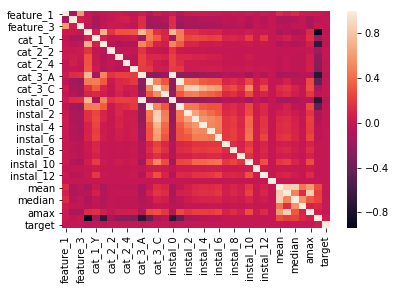

In [40]:
import seaborn as sns
sns.heatmap(mrg_6.corr())

In [41]:
mrg_5.corr()

,feature_1,feature_2,feature_3,target,cat_1_N,cat_1_Y,cat_2_1,cat_2_2,cat_2_3,cat_2_4,cat_2_5,cat_3_A,cat_3_B,cat_3_C,instal_-1,instal_0,instal_1,instal_2,instal_3,instal_4,instal_5,instal_6,instal_7,instal_8,instal_9,instal_10,instal_11,instal_12,instal_999
feature_1,1.000000,-0.130098,0.582980,-0.010884,0.012922,-0.026967,0.007128,0.019855,0.029043,-0.008993,-0.017129,0.037023,-0.040025,0.031806,-0.016609,0.037023,-0.040025,0.018027,0.031424,0.028481,0.015991,0.021785,0.001622,0.013829,0.001734,0.025513,-0.008605,0.025409,0.002391
feature_2,-0.130098,1.000000,0.059928,-0.003607,0.017683,-0.124869,-0.045219,0.009891,0.043723,0.064957,0.014533,0.130207,-0.155408,-0.125049,-0.079574,0.130207,-0.155408,-0.102410,-0.110155,-0.088223,-0.076555,-0.076787,-0.030136,-0.036656,-0.017189,-0.075581,-0.008436,-0.047033,-0.003141
feature_3,0.582980,0.059928,1.000000,-0.007330,-0.008769,-0.139761,-0.018030,0.022635,0.015601,-0.006691,-0.026069,0.144161,-0.208448,-0.162165,-0.159886,0.144161,-0.208448,-0.129032,-0.137768,-0.116120,-0.119008,-0.104043,-0.050962,-0.061397,-0.041496,-0.110986,-0.019144,-0.044896,-0.003609
target,-0.010884,-0.003607,-0.007330,1.000000,-0.041493,-0.009101,-0.032996,-0.006232,-0.004504,-0.013614,-0.012758,-0.031694,-0.020116,-0.001459,0.004389,-0.031694,-0.020116,-0.004338,-0.002455,0.003660,0.003532,0.001081,0.005831,0.001004,0.006014,0.004063,-0.003200,-0.002580,-0.000944
cat_1_N,0.012922,0.017683,-0.008769,-0.041493,1.000000,0.064595,0.698562,0.171571,0.299167,0.296796,0.322770,0.741545,0.456230,0.165911,0.091065,0.741545,0.456230,0.158652,0.158531,0.094504,0.087868,0.092373,0.017588,0.024950,0.014323,0.054391,0.009533,0.015569,0.000489
cat_1_Y,-0.026967,-0.124869,-0.139761,-0.009101,0.064595,1.000000,0.073623,-0.007753,0.013815,0.015944,0.032351,-0.147194,0.473424,0.325702,0.118234,-0.147194,0.473424,0.249573,0.265285,0.245366,0.212969,0.235243,0.099851,0.108160,0.078681,0.207753,0.027220,0.195508,0.006897
cat_2_1,0.007128,-0.045219,-0.018030,-0.032996,0.698562,0.073623,1.000000,-0.044792,-0.097194,-0.063454,-0.078929,0.512640,0.331226,0.096309,0.045754,0.512640,0.331226,0.094764,0.104856,0.031017,0.031644,0.048868,0.009809,0.013688,0.007897,0.023272,0.002832,0.018245,0.001932
cat_2_2,0.019855,0.009891,0.022635,-0.006232,0.171571,-0.007753,-0.044792,1.000000,-0.022542,-0.004869,-0.018006,0.169617,0.021296,0.007236,-0.014799,0.169617,0.021296,0.010204,0.005686,0.007580,0.004872,0.002031,-0.003165,-0.003183,-0.001491,-0.003552,-0.000977,-0.006608,-0.000425
cat_2_3,0.029043,0.043723,0.015601,-0.004504,0.299167,0.013815,-0.097194,-0.022542,1.000000,-0.024433,-0.054794,0.226722,0.118190,0.109662,0.084689,0.226722,0.118190,0.110080,0.088766,0.097761,0.065296,0.053409,0.010909,0.010939,0.002981,0.039110,0.008115,0.001010,-0.000891
cat_2_4,-0.008993,0.064957,-0.006691,-0.013614,0.296796,0.015944,-0.063454,-0.004869,-0.024433,1.000000,-0.039798,0.223075,0.131023,0.039666,-0.003352,0.223075,0.131023,0.032100,0.041142,0.027074,0.022775,0.023405,0.003381,0.007350,0.006739,0.016320,0.003782,0.006216,-0.000657


In [42]:
mrg_6.to_csv('all_df.csv', header = True, index = None)